<a href="https://colab.research.google.com/github/LukynZa/Employees-logistic-regression-project/blob/main/Empolyees_logistic_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importy
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation,rc
%matplotlib inline
import matplotlib.patches as mpatches
import numpy as np
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import warnings
warnings.filterwarnings('ignore')
from scipy import signal
import plotly.express as px
import io
import base64
from IPython.display import HTML, display


from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#load datasets

attrition =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/zaměstnanci - projekt/attrition.csv')

df1 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/zaměstnanci - projekt/df1.csv')

df2 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/zaměstnanci - projekt/df2.csv')

sample_output =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/zaměstnanci - projekt/sample_output.csv')

In [3]:
# connect to complete DF
df = pd.merge(df1, df2, on='EmployeeNumber')

In [4]:
# check 1st 5 rows
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [5]:
# check last 5 rows in DF
df.tail()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4448,7979,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [6]:
# dataset
df.shape

(4449, 36)

In [7]:
# column names and their data types
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

EmployeeNumber                int64
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           

In [8]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

EmployeeNumber.........0
Age.........0
BusinessTravel.........0
DailyRate.........0
Department.........0
DistanceFromHome.........0
Education.........0
EducationField.........0
EmployeeCount.........0
EnvironmentSatisfaction.........0
Gender.........0
HourlyRate.........0
JobInvolvement.........0
JobLevel.........0
JobRole.........0
JobSatisfaction.........0
MaritalStatus.........0
MonthlyIncome.........0
MonthlyRate.........0
NumCompaniesWorked.........0
Over18.........0
OverTime.........0
PercentSalaryHike.........0
PerformanceRating.........0
RelationshipSatisfaction.........0
StandardHours.........0
StockOptionLevel.........0
TotalWorkingYears.........0
TrainingTimesLastYear.........0
WorkLifeBalance.........0
YearsAtCompany.........0
YearsInCurrentRole.........0
YearsSinceLastPromotion.........0
YearsWithCurrManager.........0
Attrition.........147
YearlyIncome.........0


In [9]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [11]:
#unique values in columns
print(df.apply(lambda col: col.unique()))

EmployeeNumber              [104, 1638, 164, 395, 53, 1467, 727, 351, 555,...
Age                         [30.0, 38.0, 26.0, 28.0, 35.0, 34.0, 32.0, 42....
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [852.0, 397.0, 841.0, 1117.0, 464.0, 1107.0, 1...
Department                   [Research & Development, Human Resources, Sales]
DistanceFromHome            [1.0, 2.0, 6.0, 8.0, 4.0, 9.0, 3.0, 5.0, 22.0,...
Education                                           [1.0, 2.0, 3.0, 4.0, 5.0]
EducationField              [Life Sciences, Medical, Other, Technical Degr...
EmployeeCount                                                           [1.0]
EnvironmentSatisfaction                                  [4.0, 3.0, 1.0, 2.0]
Gender                                                         [Male, Female]
HourlyRate                  [55.0, 54.0, 46.0, 66.0, 75.0, 52.0, 39.0, 56....
JobInvolvement                                           [2.0, 3

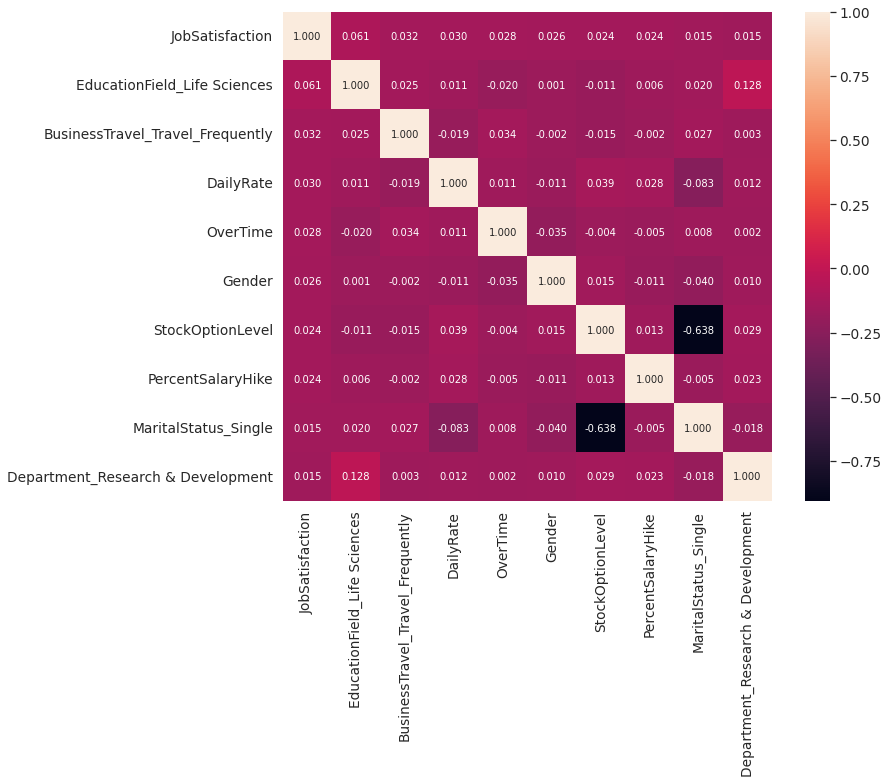

In [56]:
#TOP 10 correlation matrix for JobSatisfaction
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'JobSatisfaction')['JobSatisfaction'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Drop objects

In [13]:
# Drop irelevant columns
df.drop(['Over18'], inplace=True, axis=1)
df.drop(['EmployeeCount'], inplace=True, axis=1)
df.drop(['StandardHours'], inplace=True, axis=1) 
df.drop(['YearlyIncome'], inplace=True, axis=1) 

# Data cleaning

In [14]:
# Now we need to change objects to floats 
df['OverTime'] = df['OverTime'].replace(['Yes','No'],[1,0])
df['Attrition'] = df['Attrition'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

In [15]:
# Similar situation as above but there is more variables so we use dummies
dummy = ['MaritalStatus','BusinessTravel', 'Department', 'EducationField',]
df = pd.get_dummies(df, columns=dummy, drop_first=True)

In [16]:
#data clearing - wrong values in: DistanceFromHome
for x in df.index:
  if df.loc[x, "DistanceFromHome"] > 29:
    df.loc[x, "DistanceFromHome"] = 30

#There are a lot of distances with wrong values (like 915 582 etc...) Max value wich seems to be correct is 29, followed by big gap.
# This is why everything 30+ is reduced to 30. 

In [17]:
 df['DistanceFromHome']

0        1.0
1        2.0
2        6.0
3        8.0
4        4.0
        ... 
4444    15.0
4445    15.0
4446    30.0
4447    30.0
4448    30.0
Name: DistanceFromHome, Length: 4449, dtype: float64

In [18]:
for col in df.columns:
    print(col)

EmployeeNumber
Age
DailyRate
DistanceFromHome
Education
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Attrition
MaritalStatus_Married
MaritalStatus_Single
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree


In [19]:
#Description functions
def des_object(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("*********************************")
    print("")
def des_numeric(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("***********")
    print(df[varname].describe())
    sns.histplot(df, x=varname, kde = True)
    plt.show()
    print("*********************************")
    print("")
def des_df(df):
    for c in df.columns:
        if df[c].dtype == object:
            des_object(df,c)
        else:
            des_numeric(df,c)

In [20]:
#Next step is to correct wrong values in other columns. We need to repair them because if we would drop them, 
#there it would be a huge reductuion in dataset. 

#Highest values that seems to be correct:

#YearsWithCurrManager = 9
#YearsSinceLastPromotion = 9
#YearsInCurrentPossition = 9
#YearsAtCompanz = 9

In [21]:
#Age = Education + TotalWorkinYears
for x in df.index:
  if df.loc[x, "Age"] > 60:
    if df.loc[x, "Education"] == 1:
      df.loc[x, "Age"] = 18 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 2:
      df.loc[x, "Age"] = 19 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 3:
      df.loc[x, "Age"] = 22 + df.loc[x, "TotalWorkingYears"]
    elif df.loc[x, "Education"] == 4:
      df.loc[x, "Age"] = 24 + df.loc[x, "TotalWorkingYears"]
    else:
      df.loc[x, "Age"] = 27 + df.loc[x, "TotalWorkingYears"]

#TotalWorkingYears = Age - Education
for x in df.index:
  if df.loc[x, "TotalWorkingYears"] > 40:
    if df.loc[x, "Education"] == 1:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 18 
    elif df.loc[x, "Education"] == 2:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 19
    elif df.loc[x, "Education"] == 3:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 22
    elif df.loc[x, "Education"] == 4:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 24
    else:
      df.loc[x, "TotalWorkingYears"] = df.loc[x, "Age"] - 27 

#Solving 4 values of -4 by putting 0 instead. They dont have Age to have this kind of degree 
# (different country Age at schools most likely we have no idea where the data comes from).
for x in df.index:
  if df.loc[x, "TotalWorkingYears"] == -4:
    df.loc[x, "TotalWorkingYears"] = 0

#YearsAtCompany = YearsInCurrentRole + YearsSinceLastPromotion
for x in df.index:
  if df.loc[x, "YearsAtCompany"] > 40:
    df.loc[x, "YearsAtCompany"] = df.loc[x, "YearsInCurrentRole"] + df.loc[x, "YearsSinceLastPromotion"]

#YearsSinceLastPromotion = YearsAtCompany - YearsInCurrentRole
for x in df.index:
  if df.loc[x, "YearsSinceLastPromotion"] > 40:
    df.loc[x, "YearsSinceLastPromotion"] = df.loc[x, "YearsAtCompany"] - df.loc[x, "YearsInCurrentRole"]

#YearsInCurrentRole = YearsAtCompany - YearsSinceLastPromotion
for x in df.index:
  if df.loc[x, "YearsInCurrentRole"] > 40:
    df.loc[x, "YearsInCurrentRole"] = df.loc[x, "YearsAtCompany"] - df.loc[x, "YearsSinceLastPromotion"]

#YearsWithCurrManager = YearsInCurrentRole
for x in df.index:
  if df.loc[x, "YearsWithCurrManager"] > 40:
    df.loc[x, "YearsWithCurrManager"] = df.loc[x, "YearsInCurrentRole"]


*********************************
***********
YearsAtCompany | type: float64
***********
There are 37 different values.
5.0     583
1.0     512
3.0     385
2.0     381
4.0     381
10.0    341
7.0     261
Name: YearsAtCompany, dtype: int64
***********
count    4449.000000
mean        6.928748
std         6.040489
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


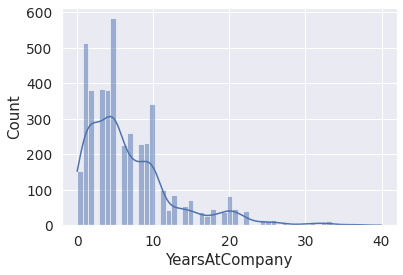

*********************************



In [22]:
#Data distribution - control check
des_numeric(df,'YearsAtCompany')


*********************************
***********
YearsSinceLastPromotion | type: float64
***********
There are 17 different values.
0.0    1674
1.0    1117
2.0     506
7.0     209
3.0     202
4.0     195
5.0     134
Name: YearsSinceLastPromotion, dtype: int64
***********
count    4449.000000
mean        2.203641
std         3.209890
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        18.000000
Name: YearsSinceLastPromotion, dtype: float64


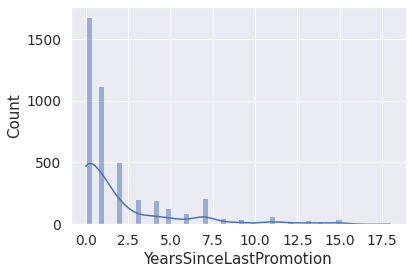

*********************************



In [23]:
#Data distribution - control check
des_numeric(df,'YearsSinceLastPromotion')


*********************************
***********
YearsInCurrentRole | type: float64
***********
There are 21 different values.
2.0    1101
0.0     701
7.0     623
3.0     406
4.0     331
8.0     277
1.0     243
Name: YearsInCurrentRole, dtype: int64
***********
count    4449.000000
mean        4.240279
std         3.695106
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        34.000000
Name: YearsInCurrentRole, dtype: float64


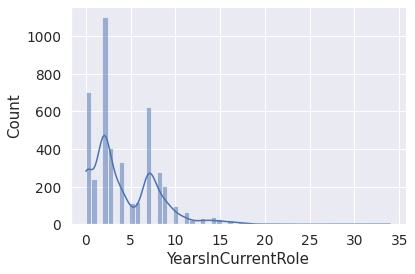

*********************************



In [24]:
#Data distribution - control check
des_numeric(df,'YearsInCurrentRole')


*********************************
***********
YearsWithCurrManager | type: float64
***********
There are 19 different values.
2.0    1054
0.0     783
7.0     640
3.0     430
8.0     310
4.0     309
1.0     224
Name: YearsWithCurrManager, dtype: int64
***********
count    4449.000000
mean        4.148348
std         3.601124
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsWithCurrManager, dtype: float64


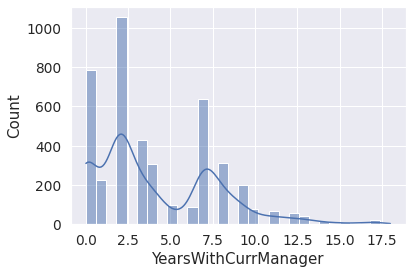

*********************************



In [25]:
#Data distribution - control check
des_numeric(df,'YearsWithCurrManager')

# Data training

In [26]:
#Data split
df_Test = df[df['EmployeeNumber'] >= 100000]
df_train = df[df['EmployeeNumber'] < 100000]

In [27]:
X = df_train.drop(['Attrition'], axis=1)
y = df_train['Attrition']

X_df_test = df_Test.drop(['Attrition'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
models = [
    #LogisticRegression(),
    RandomForestClassifier(), # n_estimators=100, max_depth=5, random_state=42
    #SVC(probability=True),
    #KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier()
    ]

# Dořešit chybu:

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Train and score algorithms
for m in models:
    
    m.fit(X_train, y_train)
    pred = m.predict(X_df_test)
    #auc = roc_auc_score(y_test, pred)
    cv = cross_val_score(m, X_test, y_test, cv=5).mean() 
    X_df_test['pred']=pred
    print(m.__class__.__name__)
    #print('AUC-ROC score: ', auc)
    print('AUC-ROC score (cv=5): ', cv)
    print("-----------------------")

ValueError: ignored

In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

ValueError: ignored